In [ ]:
import os, sys, subprocess

REPO = "https://github.com/jongmoonha/Signal_Processing_Practice.git"
DIR  = "Signal_Processing_Practice"

try:
    import google.colab  # Colab 전용 모듈
    if not os.path.isdir(DIR):
        subprocess.run(["git","clone",REPO], check=True)
    print('We are in Google Colab environment.')
    os.chdir('/content/'+DIR)
    print('Current working directory:', os.getcwd())

except ImportError:
    print('We are in a local environment, not Google Colab.')
    pass

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import mlab
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

from scipy import signal, stats
from scipy.io import loadmat
from scipy.signal import hilbert
from scipy.signal import lfilter
from scipy.interpolate import interp1d
import utils

plt.rc('font', size=20)

In [3]:
try:
    import librosa
    import pywt
except ImportError:
    %pip install librosa
    %pip install PyWavelets
    import librosa
    import pywt

# Experiment

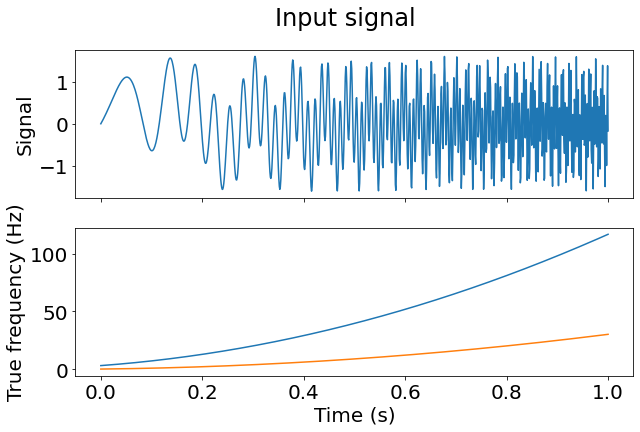

In [9]:
def gaussian(x, x0, sigma):
    return np.exp(-np.power((x - x0) / sigma, 2.0) / 2.0)

def make_chirp(t, t0, a):
    frequency = (a * (t + t0)) ** 2
    chirp = np.sin(2 * np.pi * frequency * t)
    return chirp, frequency

# generate signal
fs = 1024
t = np.linspace(0, 1, fs)
chirp1, frequency1 = make_chirp(t, 0.2, 9)
chirp2, frequency2 = make_chirp(t, 0.1, 5)
y = chirp1 + 0.6 * chirp2
# y *= gaussian(time, 0.5, 0.2)

# plot signal
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
axs[0].plot(t, y)
axs[1].plot(t, frequency1)
axs[1].plot(t, frequency2)
axs[1].set_xlabel("Time (s)")
axs[0].set_ylabel("Signal")
axs[1].set_ylabel("True frequency (Hz)")
plt.suptitle("Input signal")
plt.show()

7 Time Segments


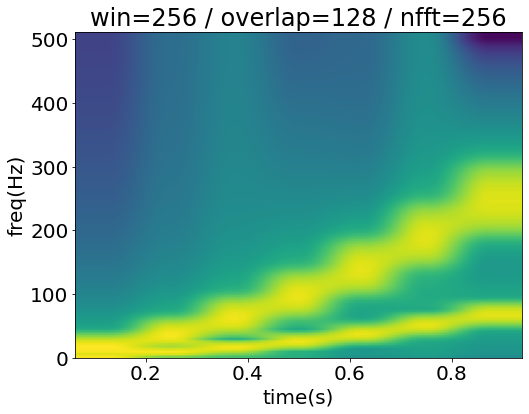

Frequency Axis:  [  0.   4.   8.  12.  16.  20.  24.  28.  32.  36.  40.  44.  48.  52.
  56.  60.  64.  68.  72.  76.  80.  84.  88.  92.  96. 100. 104. 108.
 112. 116. 120. 124. 128. 132. 136. 140. 144. 148. 152. 156. 160. 164.
 168. 172. 176. 180. 184. 188. 192. 196. 200. 204. 208. 212. 216. 220.
 224. 228. 232. 236. 240. 244. 248. 252. 256. 260. 264. 268. 272. 276.
 280. 284. 288. 292. 296. 300. 304. 308. 312. 316. 320. 324. 328. 332.
 336. 340. 344. 348. 352. 356. 360. 364. 368. 372. 376. 380. 384. 388.
 392. 396. 400. 404. 408. 412. 416. 420. 424. 428. 432. 436. 440. 444.
 448. 452. 456. 460. 464. 468. 472. 476. 480. 484. 488. 492. 496. 500.
 504. 508. 512.]
Time Axis:  [0.125 0.25  0.375 0.5   0.625 0.75  0.875]


In [5]:
n_win_numb=256;
n_win = np.hamming(n_win_numb);
n_overlap = 128;
nfft = n_win_numb;

print('7 Time Segments')
plt.figure(figsize=(8,6))
Pxx, freqs, bins, im = plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')
plt.show()

print('Frequency Axis: ', freqs)
print('Time Axis: ', bins)

### Poor Example

Frequency Axis:  [  0. 128. 256. 384. 512.]
Time Axis:  [0.00390625 0.01171875 0.01953125 0.02734375 0.03515625 0.04296875
 0.05078125 0.05859375 0.06640625 0.07421875 0.08203125 0.08984375
 0.09765625 0.10546875 0.11328125 0.12109375 0.12890625 0.13671875
 0.14453125 0.15234375 0.16015625 0.16796875 0.17578125 0.18359375
 0.19140625 0.19921875 0.20703125 0.21484375 0.22265625 0.23046875
 0.23828125 0.24609375 0.25390625 0.26171875 0.26953125 0.27734375
 0.28515625 0.29296875 0.30078125 0.30859375 0.31640625 0.32421875
 0.33203125 0.33984375 0.34765625 0.35546875 0.36328125 0.37109375
 0.37890625 0.38671875 0.39453125 0.40234375 0.41015625 0.41796875
 0.42578125 0.43359375 0.44140625 0.44921875 0.45703125 0.46484375
 0.47265625 0.48046875 0.48828125 0.49609375 0.50390625 0.51171875
 0.51953125 0.52734375 0.53515625 0.54296875 0.55078125 0.55859375
 0.56640625 0.57421875 0.58203125 0.58984375 0.59765625 0.60546875
 0.61328125 0.62109375 0.62890625 0.63671875 0.64453125 0.65234375
 0.660

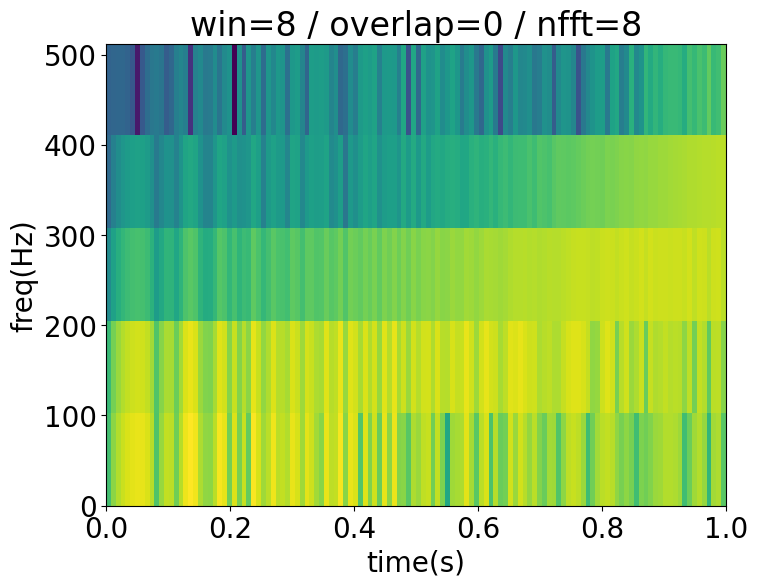

In [6]:
n_win_numb=8;
n_win = np.hamming(n_win_numb);
n_overlap = 0;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
Pxx, freqs, bins, im = plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

print('Frequency Axis: ', freqs)
print('Time Axis: ', bins)

## Increasing winow length


In [23]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 16;
nfft = n_win_numb;

Text(0, 0.5, 'freq(Hz)')

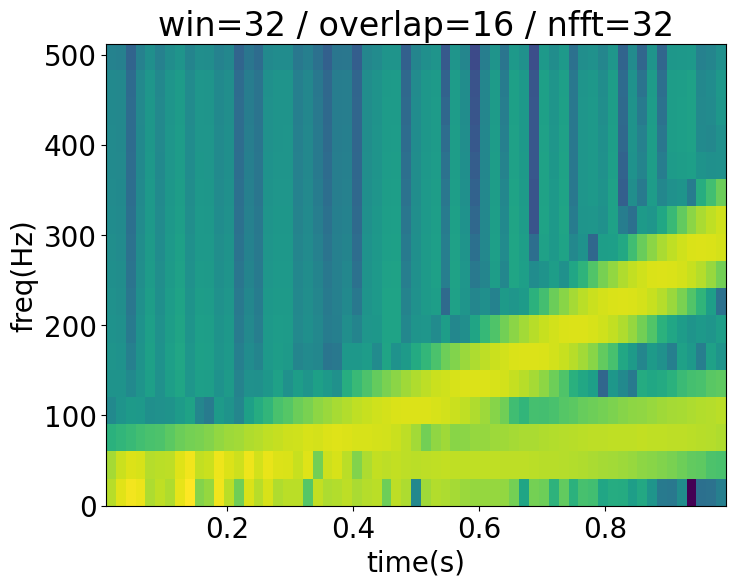

In [24]:
plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

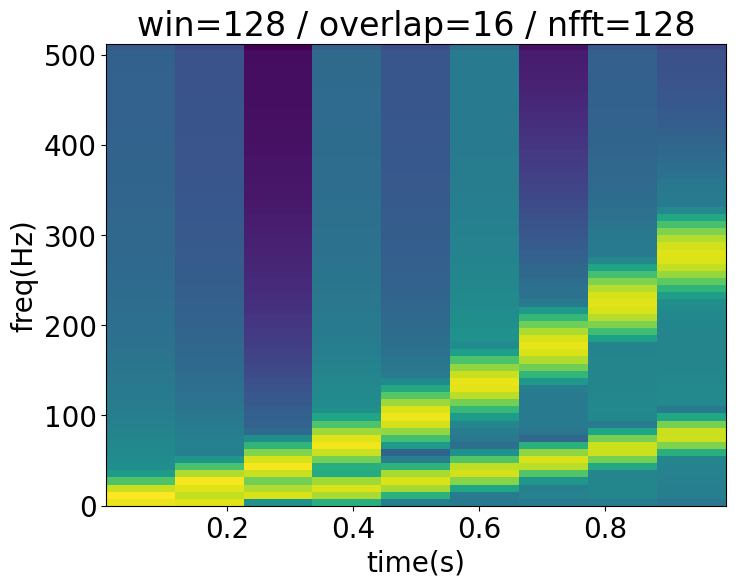

In [9]:
n_win_numb = 128;
n_win = np.hamming(n_win_numb);
n_overlap = 16;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

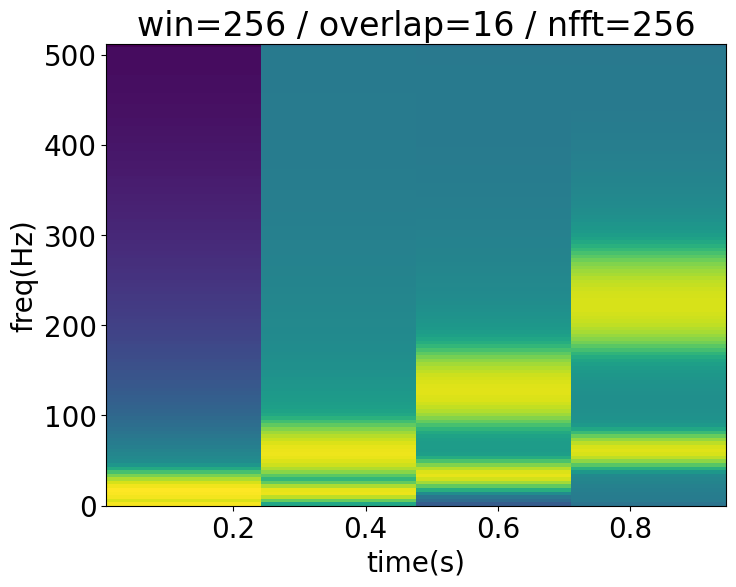

In [10]:
n_win_numb = 256;
n_win = np.hamming(n_win_numb);
n_overlap = 16;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
# plt.title(['win=',n_win_numb,' / overlap=',n_overlap, ' / nfft=',nfft]);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

## Increasing Overlap


Text(0, 0.5, 'freq(Hz)')

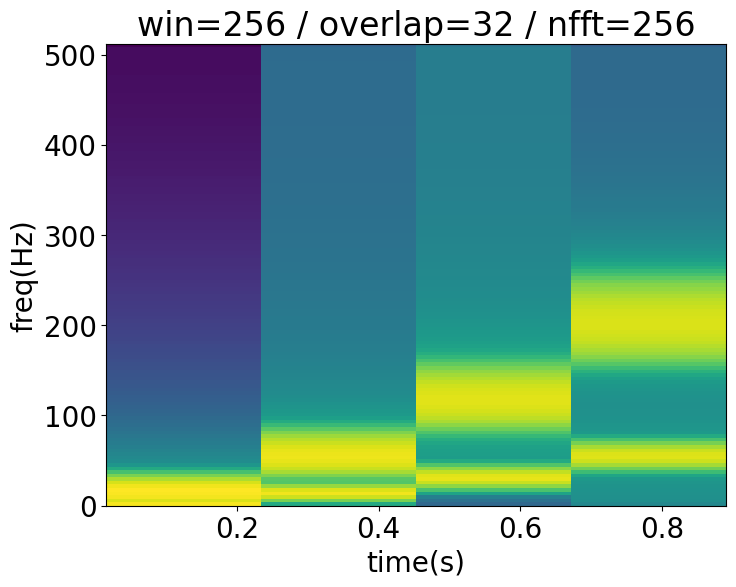

In [11]:
n_win_numb = 256;
n_win = np.hamming(n_win_numb);
n_overlap = 32;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

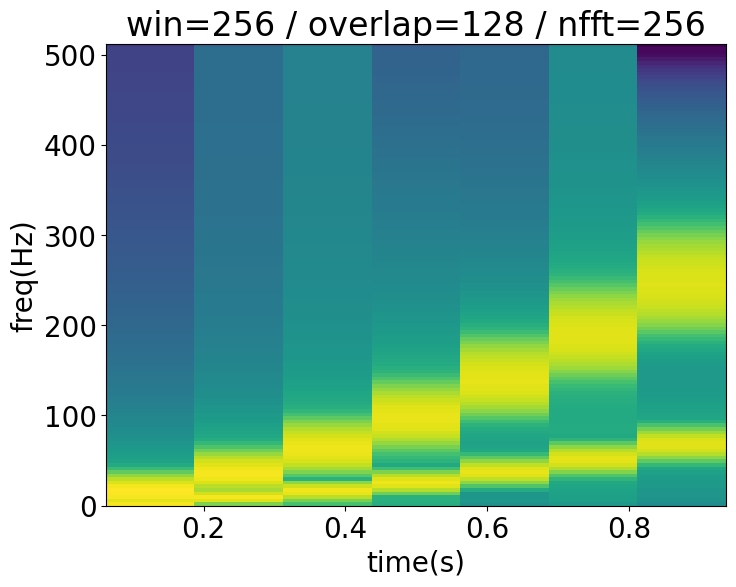

In [12]:
n_win_numb = 256;
n_win = np.hamming(n_win_numb);
n_overlap = 128;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

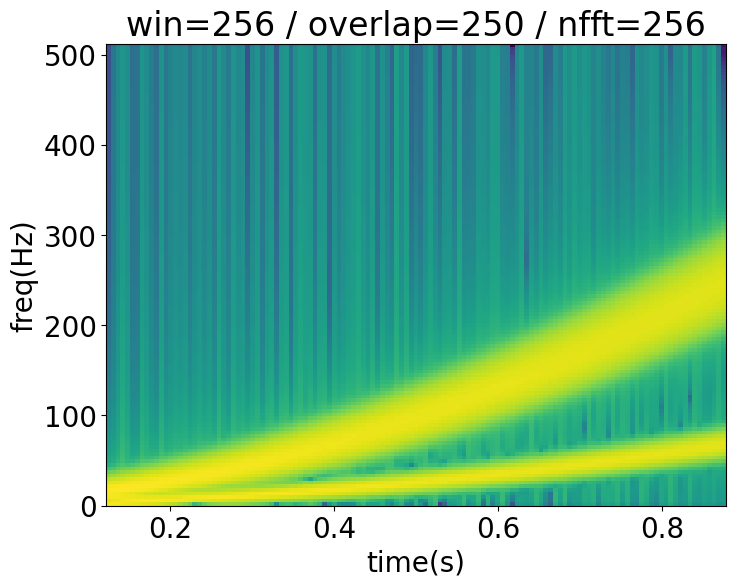

In [13]:
n_win_numb = 256;
n_win = np.hamming(n_win_numb);
n_overlap = 250;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

## Increasing nfft


Text(0, 0.5, 'freq(Hz)')

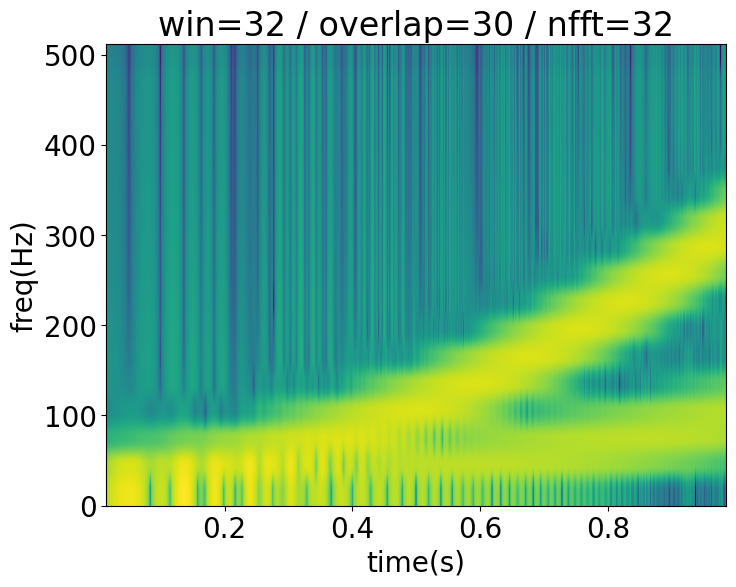

In [14]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 30;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

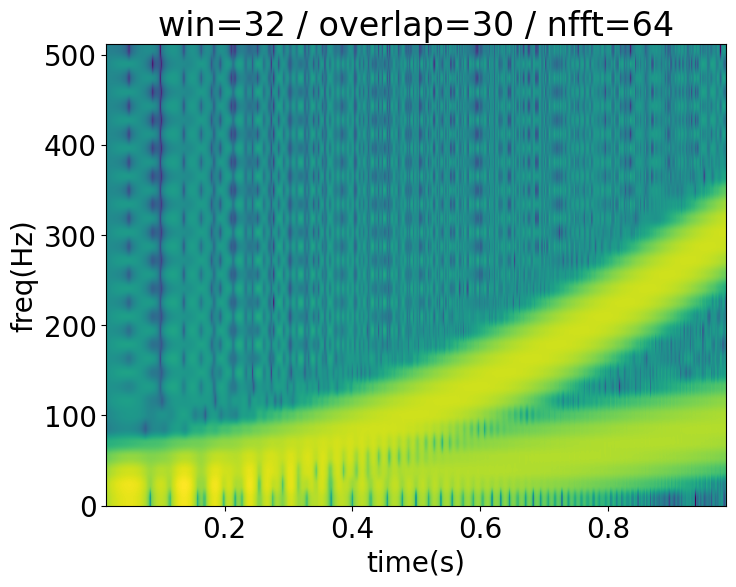

In [27]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 30;
nfft = n_win_numb;
pad_to = nfft*2;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap, pad_to=pad_to);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={pad_to}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

Text(0, 0.5, 'freq(Hz)')

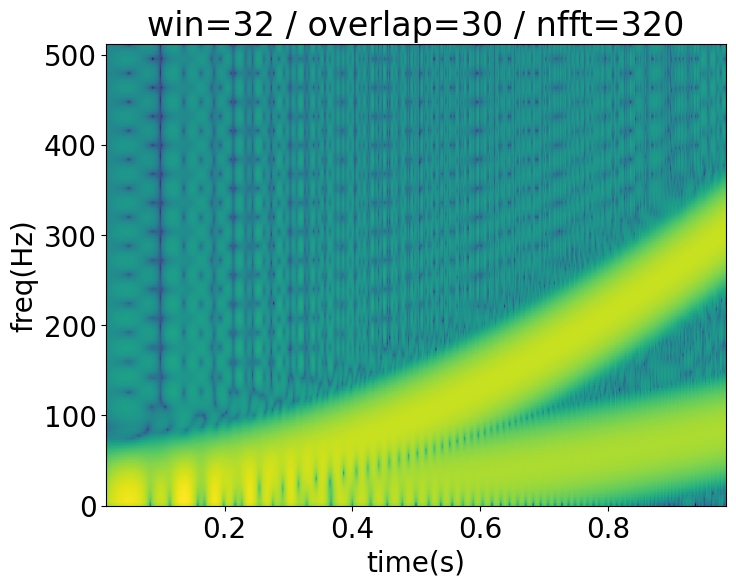

In [32]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 30;
nfft = n_win_numb;
pad_to = nfft*10;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap, pad_to=pad_to);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={pad_to}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

## Comparison Study

Text(0, 0.5, 'freq(Hz)')

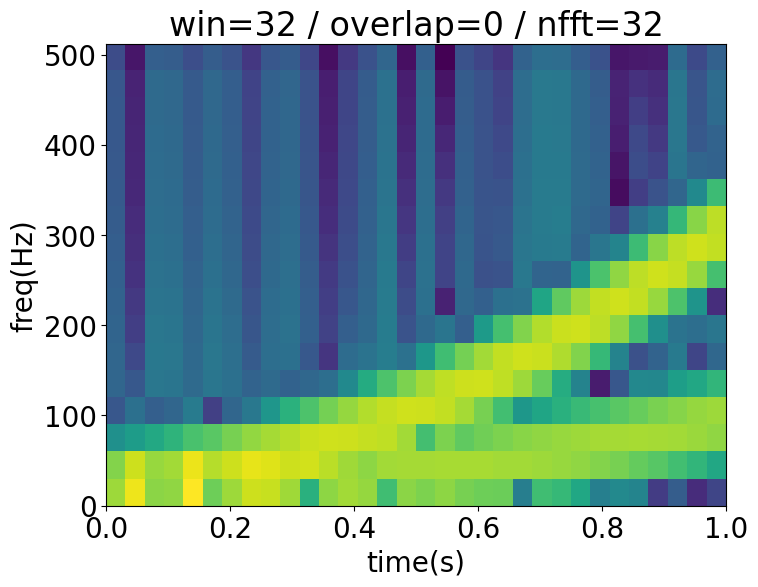

In [17]:
n_win_numb = 32;
n_win = np.hamming(n_win_numb);
n_overlap = 0;
nfft = n_win_numb;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')

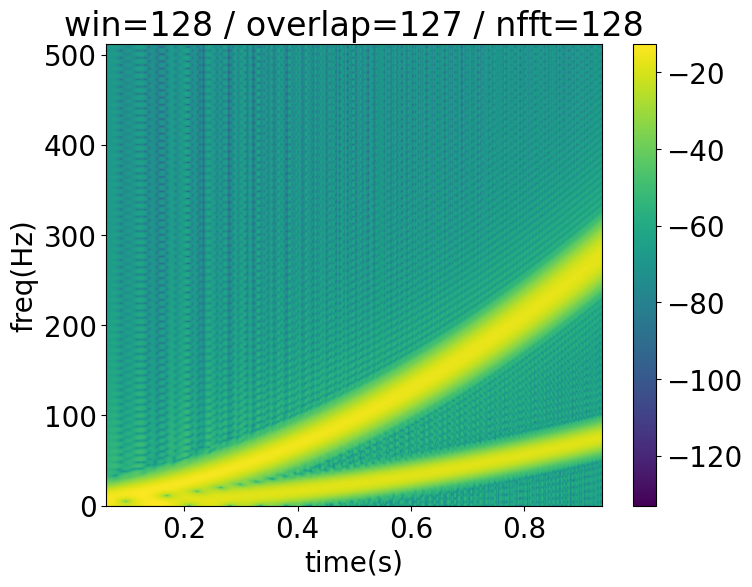

In [18]:
n_win_numb = 128;
n_win = np.hamming(n_win_numb);
n_overlap = 127;
nfft = n_win_numb;
pad_to = nfft*10;

plt.figure(figsize=(8,6))
plt.specgram(y, NFFT = nfft, Fs = fs, window = n_win, noverlap = n_overlap, pad_to=pad_to);
plt.title(f'win={n_win_numb} / overlap={n_overlap} / nfft={nfft}');
plt.xlabel('time(s)');plt.ylabel('freq(Hz)')
plt.colorbar();

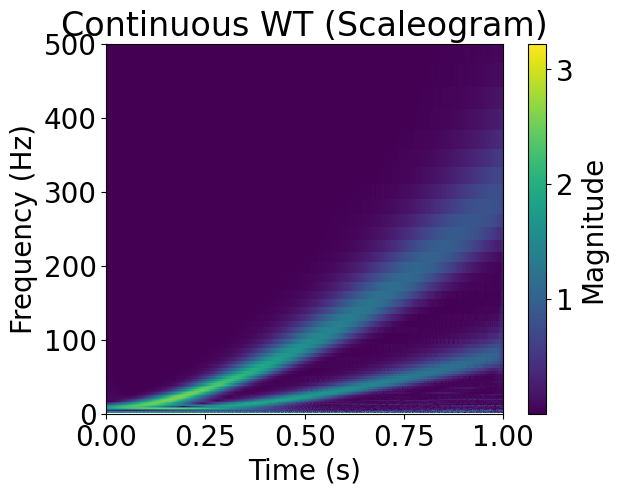

In [33]:
# perform CWT
wavelet = "cmor1.5-1.0"
# logarithmic scale for scales, as suggested by Torrence & Compo:
widths = np.geomspace(1, 1024, num=100)
cwtmatr, freqs = pywt.cwt(y, widths, wavelet, sampling_period=1/fs)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])
plt.pcolormesh(t, freqs, cwtmatr, shading='auto')
plt.ylim(0, 500)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Continuous WT (Scaleogram)")
plt.colorbar(label='Magnitude')
plt.show()